In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, metrics
import statsmodels.api as sm

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/Airbnb data.csv")

In [ ]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [ ]:
# Print the data types and non-null values of each column
print(df.info())

# Print the summary statistics of the numerical columns
print(df.describe())

# Print the number of rows and columns in the dataframe
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

In [ ]:
# Check for missing values in the dataframe
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [ ]:
cols_to_drop = ['country', 'borough', 'bathrooms', 'minstay']
df.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
df.isnull().sum()


room_id                  0
survey_id                0
host_id                  0
room_type                0
city                     0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    52
last_modified            0
latitude                 0
longitude                0
location                 0
dtype: int64

In [ ]:
df['name'].fillna(value='No Name', inplace=True)


In [ ]:
df.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
last_modified           0
latitude                0
longitude               0
location                0
dtype: int64

In [ ]:
# Question 1: Who are the top earners?
top_earners = df.groupby('host_id').sum().sort_values(by='price', ascending=False)[:10]
top_earners

<ipython-input-15-3438c5499b41>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_earners = df.groupby('host_id').sum().sort_values(by='price', ascending=False)[:10]


,room_id,survey_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
host_id,,,,,,,,,
48703385,1252317219,137268,327,162.0,320,140.0,29493.0,4870.198159,454.872111
1464510,955700350,104796,686,246.5,232,111.0,11397.0,3718.063051,347.558222
8558897,368191553,45756,308,93.5,152,90.0,11300.0,1623.218182,151.312278
113977564,1626490083,129888,301,185.0,226,121.0,10098.0,4608.805650,427.912797
517215,716037989,76752,257,98.5,147,71.0,9143.0,2722.906768,254.194455
107745142,1188464866,94464,149,87.5,194,105.0,8622.0,3350.858166,316.051551
65859990,931727964,79704,350,175.0,166,74.0,8581.0,2827.845557,263.787796
46691672,660387797,63468,299,121.0,154,82.0,7779.0,2251.712636,210.098454
84453740,1097805806,90036,199,134.5,160,86.0,7412.0,3193.313834,297.846110


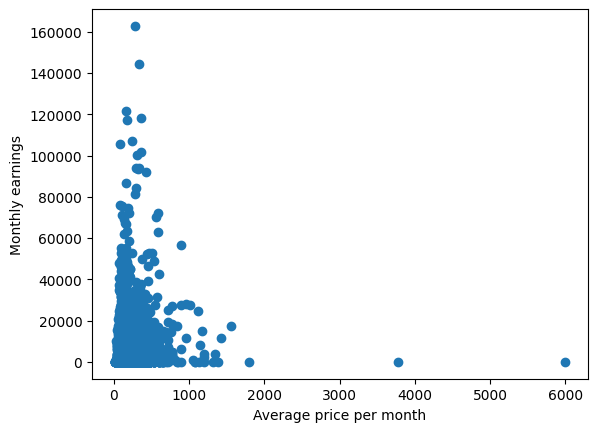

In [ ]:
import matplotlib.pyplot as plt

df['earnings'] = df['price'] * df['reviews']
monthly_data = df.groupby(['host_id', df['last_modified'].dt.month]) \
                 .agg({'earnings': 'sum', 'price': 'mean'}) \
                 .reset_index()
plt.scatter(monthly_data['price'], monthly_data['earnings'])
plt.xlabel('Average price per month')
plt.ylabel('Monthly earnings')
plt.show()


In [ ]:
# Question 3: Is any particular location getting a maximum number of bookings?
location_bookings = df.groupby('neighborhood')['room_id'].count().sort_values(ascending=False)[:10]
location_bookings

neighborhood
De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Name: room_id, dtype: int64

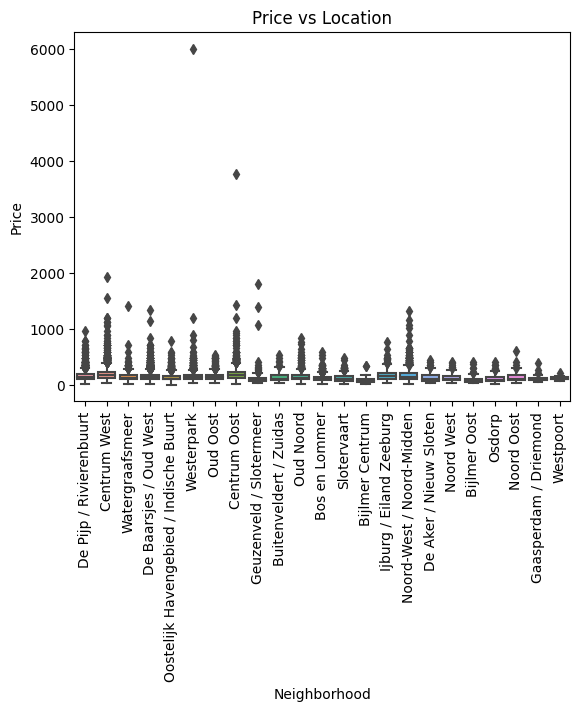

In [ ]:
# Question 4: Price relation with respect to location
sns.boxplot(x='neighborhood', y='price', data=df)
plt.title('Price vs Location')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

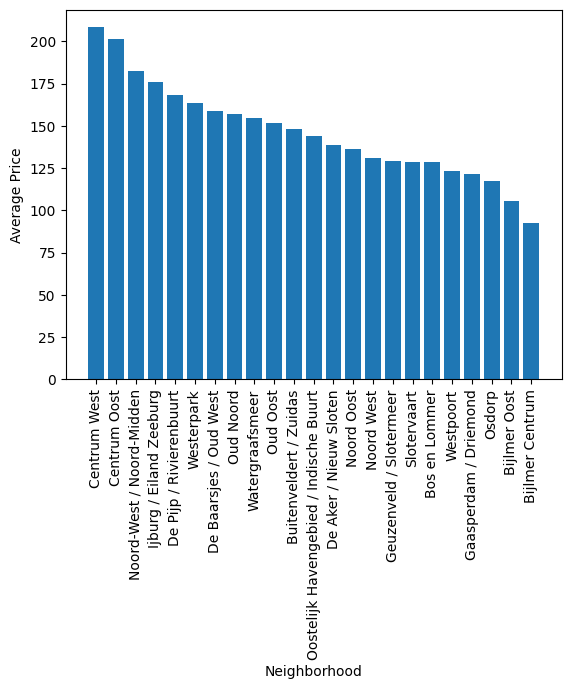

In [ ]:
#
max_bookings = df.groupby('neighborhood')['room_id'].count().sort_values(ascending=False).head(1)

#Price relation with respect to location
avg_price_by_neighborhood = df.groupby('neighborhood')['price'].mean().sort_values(ascending=False)

plt.bar(avg_price_by_neighborhood.index, avg_price_by_neighborhood.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()


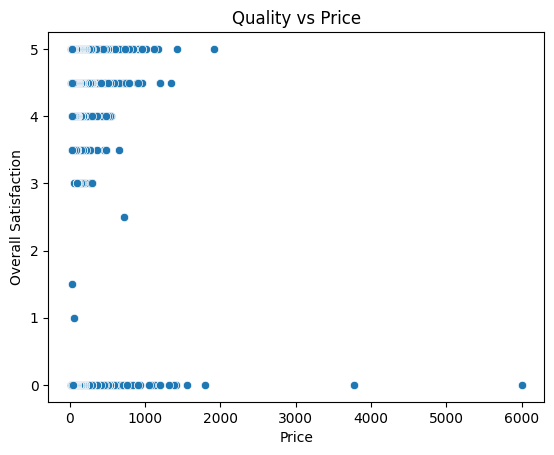

In [ ]:
# Question 5: Relationship between Quality and Price
sns.scatterplot(x='price', y='overall_satisfaction', data=df)
plt.title('Quality vs Price')
plt.xlabel('Price')
plt.ylabel('Overall Satisfaction')
plt.show()

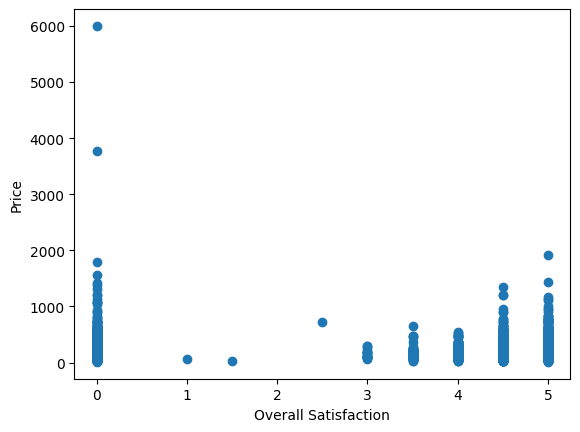

In [ ]:
plt.scatter(df['overall_satisfaction'], df['price'])
plt.xlabel('Overall Satisfaction')
plt.ylabel('Price')
plt.show()


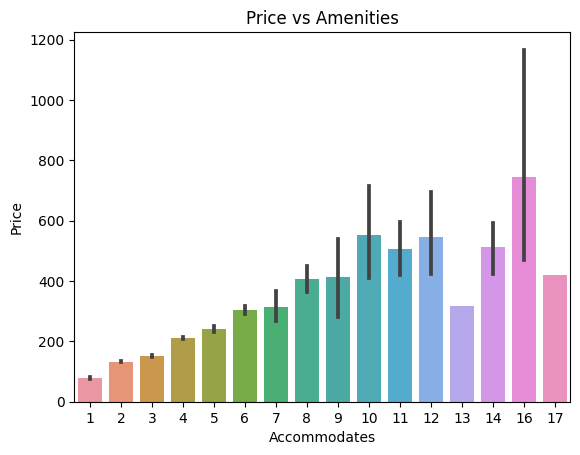

In [ ]:
# Question 6: Price vs amenities
sns.barplot(x='accommodates', y='price', data=df)
plt.title('Price vs Amenities')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

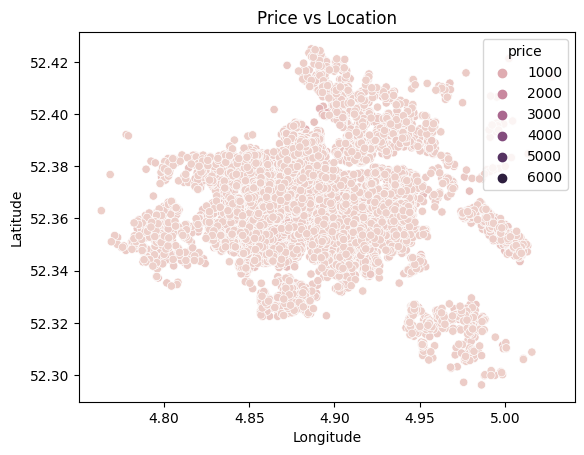

In [ ]:
# Question 7: Price vs location
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df)
plt.title('Price vs Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

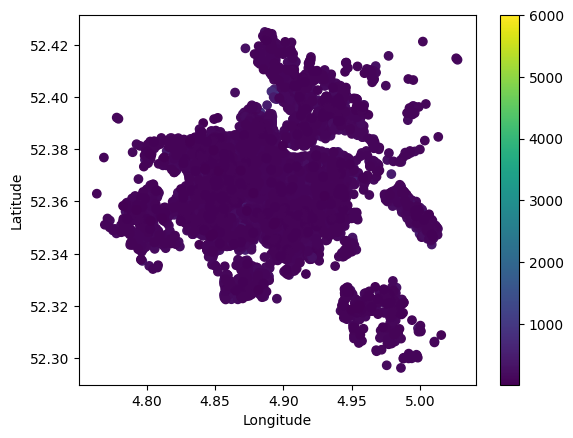

In [ ]:
plt.scatter(df['longitude'], df['latitude'], c=df['price'])
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
